<a href="https://colab.research.google.com/github/hemukurra/deep-learning/blob/main/hw3_24Fall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
titanic = pd.read_csv('/Titanic.csv')



# Display the first few rows of the dataframe
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Step 1

In [75]:
def QuantileBinning(feature, bin_number):
    """
    This function takes a numerical feature and the number of bins, and
    returns the feature binned into quantile-based bins.

    Parameters:
    - feature (pandas.Series): The numerical feature to be binned.
    - bin_number (int): The number of quantile bins.

    Returns:
    - pandas.Series: A series of discrete features binned by quantile.
    """
    # Use qcut to create quantile-based bins for the feature
    # If there are fewer unique values than bins, qcut could throw an error.
    # 'duplicates' parameter handles this by dropping redundant bins.
    return pd.qcut(feature, q=bin_number, labels=False, duplicates='drop')

# One example
feature_test = pd.DataFrame(np.random.rand(100),  columns=['Column_A'])
feature_test_discrete = QuantileBinning(feature_test['Column_A'], 10)

def label_encoder(feature):
    unique_labels = pd.unique(feature)
    label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
    transformed_feature = np.array([label_to_int[label] for label in feature])
    return transformed_feature

In [80]:

# Discretization
# Filling missing values in 'age' with the average age

titanic['age'] = titanic['age'].fillna(titanic['age'].mean())


# Selecting the subset of data with 'pclass', 'sex', 'age', 'sibsp', and 'survived'
subset_data = titanic[['pclass', 'sex', 'age', 'sibsp', 'survived']]

# Ensuring 'survived' is a binary variable (1 for survived, 0 for not survived)
subset_data['survived'] = subset_data['survived'].apply(lambda x: 1 if x == 1 else 0)

# Converting 'sex' to numerical values
subset_data = pd.get_dummies(subset_data, columns=['sex'], drop_first=True)

# Spliting the data into 80% training and 20% test sets
# Perform 80/20 train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
# Combining the feature matrix and target variable into one DataFrame
training = pd.concat([X_train, y_train], axis=1)


training.head()




,pclass,age,sibsp,sex_male,survived
772,3,17.000000,0,True,0
543,2,36.000000,0,True,0
289,1,18.000000,0,False,1
10,1,47.000000,1,True,0
147,1,29.881135,0,True,0


# Step 2

In [90]:
# define your entropy function and information gain function
import numpy as np

# Function to calculate entropy
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = -np.sum([(counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])
    return entropy_val

# Function to calculate information gain
def info_gain(data, split_attr, target_attr):
    # Calculate total entropy for the target attribute
    total_entropy = entropy(data[target_attr])

    # Calculate the weighted entropy for the split attribute
    vals, counts = np.unique(data[split_attr], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data.where(data[split_attr] == vals[i]).dropna()[target_attr]) for i in range(len(vals))])

    # Calculate information gain
    info_gain_val = total_entropy - weighted_entropy
    return info_gain_val
# Discretize the 'age' column into 4 bins
titanic['age_binned'] = pd.qcut(titanic['age'], q=4, labels=False)


# Calculate Information Gain for each feature in the training set
# Calculate Information Gain for each feature
info_gains = {}
features = ['pclass', 'sex', 'sibsp', 'age_binned']

for feature in features:
    info_gains[feature] = info_gain(titanic, feature, 'survived')





In [89]:
info_gains

{'pclass': 0.959422170862815,
 'sex': 0.959422170862815,
 'sibsp': 0.959422170862815,
 'age_binned': 0.959422170862815}

So the first split should be "sex"

# Step 3

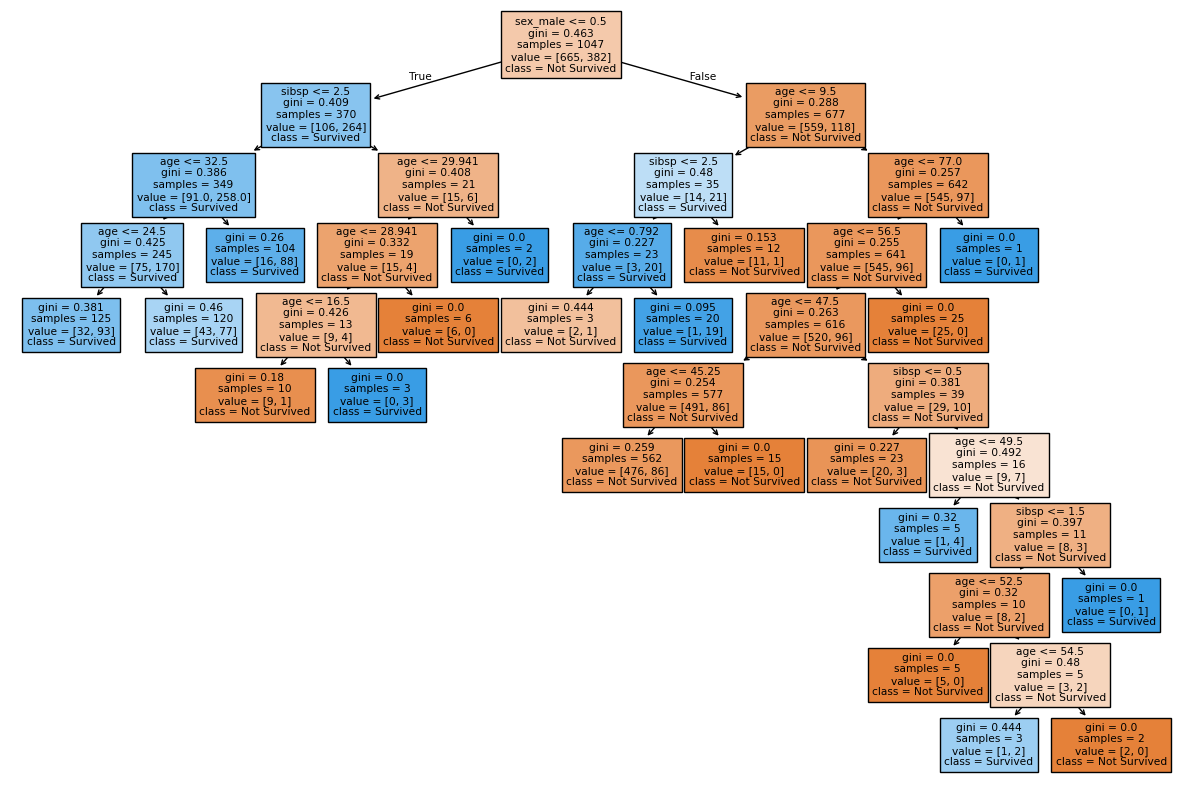

In [95]:
from sklearn.tree import DecisionTreeClassifier, plot_tree #sklearn.metrics is not imported !!!

# Instantiate the DecisionTreeClassifier


# Prepare the features and target variables for training

# Fit the decision tree model



# Plot the full decision tree
# Convert 'pclass' to numeric values
pclass_mapping = {'1st': 1, '2nd': 2, '3rd': 3}
subset_data['pclass'] = subset_data['pclass'].map(pclass_mapping)

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiating the DecisionTreeClassifier with specified parameters
student_id = 20018372  # Replace with your actual student ID
clf = DecisionTreeClassifier(max_leaf_nodes=20, random_state=student_id)

# Preparing the features (X) and target variable (y)
X = subset_data[['pclass', 'age', 'sibsp', 'sex_male']]  # Make sure 'subset_data' is ready
y = subset_data['survived']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)
import matplotlib.pyplot as plt

# Ploting the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()




In [116]:
# Define your performance metrics including accuracy, precision, recall and F1-scorre
# Function to calculate performance metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

# Evaluation
evaluate_model(y_test, y_pred)



Accuracy: 0.7710
Precision: 0.7959
Recall: 0.6610
F1 Score: 0.7222


# Step 4

Optimal max_leaf_nodes: 6


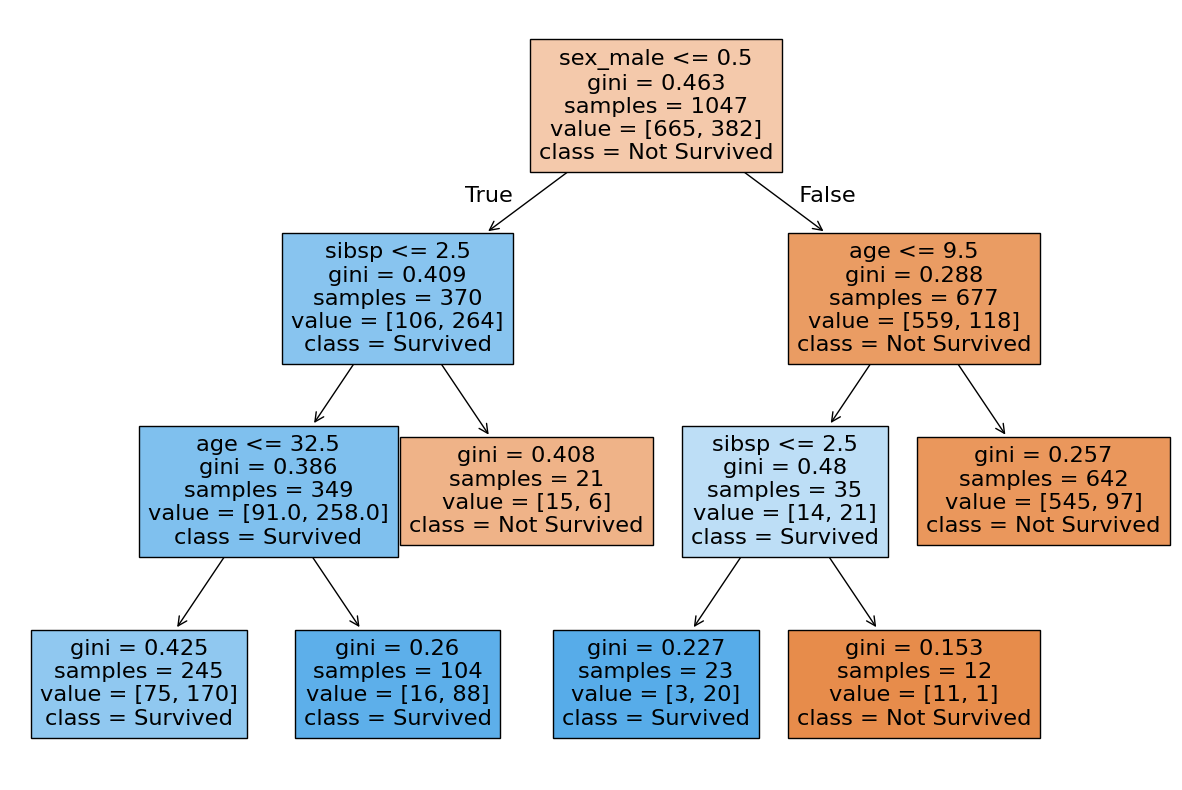

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Defining a range of max_leaf_nodes values to search
param_grid = {'max_leaf_nodes': list(range(5, 20))}

# Running grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)  # Note: only training set is used

# best estimator with the optimal max_leaf_nodes parameter
best_tree = grid_search.best_estimator_

# Printing the optimal max_leaf_nodes found
print(f"Optimal max_leaf_nodes: {grid_search.best_params_['max_leaf_nodes']}")



# Plot the pruned decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()



# Step 5


In [149]:
# Training two more decision trees with varying parameters
tree_1 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_2 = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fitting the models on the training set
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

# Predicting on the test set
y_pred_tree_1 = tree_1.predict(X_test)
y_pred_tree_2 = tree_2.predict(X_test)


In [150]:
import numpy as np

# Defining a function to perform majority vote ensemble
def ensemble_vote(models, X):
    # Collecting predictions from all models
    predictions = np.array([model.predict(X) for model in models])
    # Performing majority vote by summing the predictions and deciding based on most votes
    ensemble_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
    return ensemble_predictions

# List of models
models = [best_tree, tree_1, tree_2]

# Performing majority voting on the test set
y_pred_ensemble = ensemble_vote(models, X_test)

# Evaluating the ensemble model
evaluate_model(y_test, y_pred_ensemble)



Accuracy: 0.7748
Precision: 0.8041
Recall: 0.6610
F1 Score: 0.7256


In [148]:

from sklearn.ensemble import RandomForestClassifier

# Training a RandomForest model with 50 estimators or more
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, max_leaf_nodes=grid_search.best_params_['max_leaf_nodes'])
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
evaluate_model(y_test, y_pred_rf)


Accuracy: 0.7748
Precision: 0.8041
Recall: 0.6610
F1 Score: 0.7256


In [145]:
# performance comparision

print("Ensemble Model Performance:")
evaluate_model(y_test, y_pred_ensemble)

print("Random Forest Performance:")
evaluate_model(y_test, y_pred_rf)


Ensemble Model Performance:
Accuracy: 0.7748
Precision: 0.8041
Recall: 0.6610
F1 Score: 0.7256
Random Forest Performance:
Accuracy: 0.7748
Precision: 0.8041
Recall: 0.6610
F1 Score: 0.7256
